                                                        Simple Linear Regression

In [160]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [161]:
df = pd.read_csv("D:\\pythonMachineLearning\\firstMLCode\\polynomial_regression_dataset.csv")
print(df.head())

   Units  Cost
0    1.0  95.1
1    1.2  96.5
2    1.2  73.7
3    1.2  95.6
4    1.3  98.8


In [162]:
print(df.describe())
print(df.shape)

             Units         Cost
count  1000.000000  1000.000000
mean      4.471500    40.053200
std       1.336437    10.596183
min       1.000000    20.000000
25%       3.600000    32.900000
50%       4.400000    38.300000
75%       5.300000    44.525000
max      10.000000   100.000000
(1000, 2)


In [163]:
##checking nulls
print(df.isnull().sum())

Units    0
Cost     0
dtype: int64


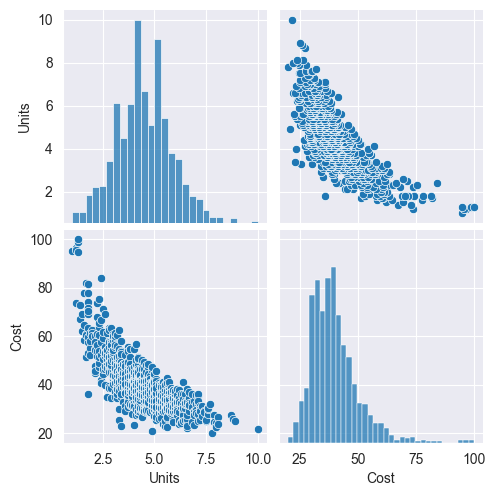

In [164]:
sns.pairplot(df)


<Axes: ylabel='Units'>

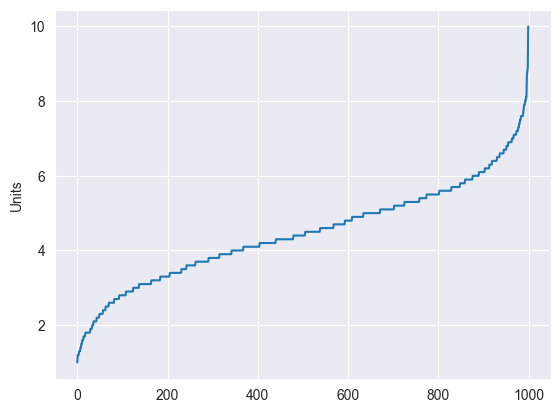

In [165]:
sns.lineplot(data=df['Units'])

<Axes: ylabel='Cost'>

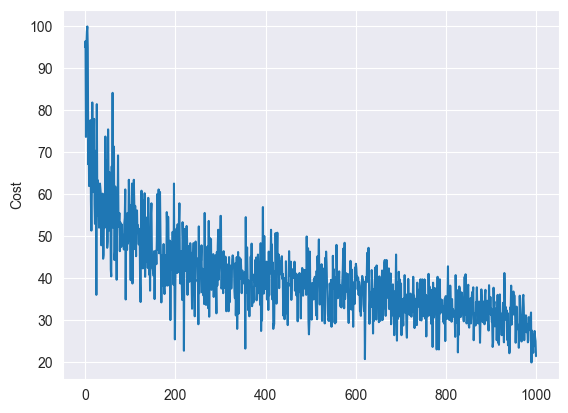

In [166]:
sns.lineplot(data=df['Cost'])

In [167]:
X = df[["Units"]]
y=df["Cost"]
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [168]:
#splitting training and test set
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=2529)

In [169]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train) #fit does not split the data , it provides the entire data for training

# """When using the fit() method in scikit-learn (sklearn) without explicitly specifying a train/test split, the entire dataset provided is used for training the model. However, to evaluate the model's performance properly, it's crucial to split the data into training and testing sets before fitting the model.
# The train_test_split function from sklearn.model_selection is commonly used for this purpose. By default, if no test_size is specified, it splits the data into 75% for training and 25% for testing. This default split can be adjusted using the test_size parameter, which accepts either a float (representing the proportion of the dataset to include in the test split) or an integer (representing the absolute number of test samples).
# It's important to note that using the same data for both training and testing can lead to overfitting and an overly optimistic evaluation of the model's performance. Therefore, explicitly splitting the data using train_test_split is a recommended practice in machine learning workflows."""

LinearRegression()

In [170]:
linear_regressor.intercept_, linear_regressor.coef_

(np.float64(65.82998506163781), array([-5.77565251]))

Text(0.5, 1.0, 'Unit Of Cost Vs NUmber Of Units')

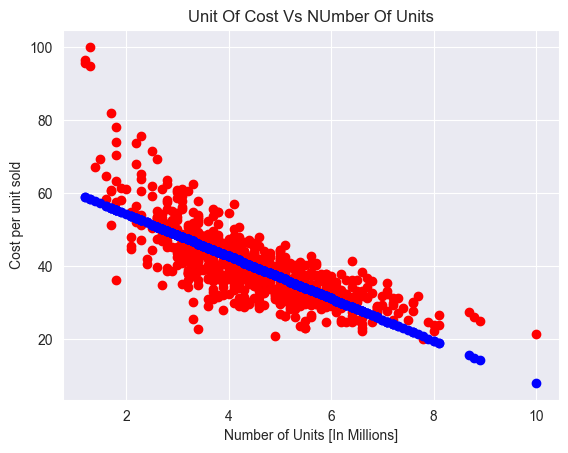

In [171]:
fig,ax = plt.subplots()
ax.scatter(X_train,y_train,color='red')
ax.scatter(X_train,linear_regressor.predict(X_train),color='blue')
ax.set_ylabel("Cost per unit sold")
ax.set_xlabel("Number of Units [In Millions]")
ax.set_title("Unit Of Cost Vs NUmber Of Units")


                                                                Polynomial Linear Regression

In [172]:
from sklearn.preprocessing import PolynomialFeatures

In [173]:
poly_regressor = PolynomialFeatures(degree=2)

In [174]:
X_poly = poly_regressor.fit_transform(X)

In [175]:
print(X_poly)#X^0,X^1,X^2

[[  1.     1.     1.  ]
 [  1.     1.2    1.44]
 [  1.     1.2    1.44]
 ...
 [  1.     8.8   77.44]
 [  1.     8.9   79.21]
 [  1.    10.   100.  ]]


In [176]:
print(X_poly.shape)

(1000, 3)


In [177]:
X_poly_train,X_poly_test,y_poly_train,y_poly_test = sklearn.model_selection.train_test_split(X_poly,y,random_state=2529)

In [178]:
regressor_poly =LinearRegression()

In [179]:
regressor_poly.fit(X_poly_train,y_poly_train)

LinearRegression()

In [180]:
regressor_poly.intercept_, regressor_poly.coef_

(np.float64(87.06106955251003),
 array([  0.        , -15.6376502 ,   1.05169852]))

Text(0.5, 1.0, 'Unit Of Cost Vs NUmber Of Units')

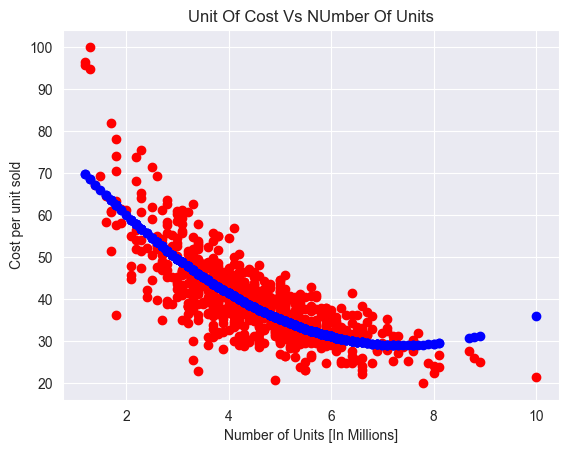

In [181]:
fig,ax = plt.subplots()
ax.scatter(X_train,y_train,color='red')
ax.scatter(X_train,regressor_poly.predict(X_poly_train),color='blue')
ax.set_ylabel("Cost per unit sold")
ax.set_xlabel("Number of Units [In Millions]")
ax.set_title("Unit Of Cost Vs NUmber Of Units")

In [182]:
y_poly_predict = regressor_poly.predict(X_poly_test)
print(y_poly_predict)

[45.21260076 61.14616584 42.82452546 32.09614843 39.26507938 61.14616584
 34.66373212 37.98853874 50.55666855 31.74183671 32.47149412 52.50629624
 37.38181938 38.61629208 34.18321658 32.47149412 42.07056831 35.68786511
 35.68786511 40.6257559  54.54005982 31.40855897 41.33764512 40.6257559
 54.54005982 55.58849256 47.78998179 35.16528163 38.61629208 48.69117674
 35.68786511 38.61629208 33.28528741 31.09631519 29.13074579 55.58849256
 42.07056831 48.69117674 28.93673499 32.86787378 35.68786511 38.61629208
 39.93490066 29.04987569 43.59951659 41.33764512 31.09631519 35.16528163
 42.07056831 48.69117674 32.47149412 34.66373212 31.09631519 49.61340566
 34.66373212 62.3208024  31.74183671 37.38181938 50.55666855 39.93490066
 33.72373501 46.0506938  37.98853874 36.23148256 36.79613399 39.26507938
 69.81033518 35.68786511 39.93490066 42.82452546 39.26507938 36.79613399
 44.39554169 35.68786511 50.55666855 37.38181938 72.47511787 59.99256324
 62.3208024  48.69117674 57.74845996 35.68786511 33.

In [183]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mean_absolute_percentage_error(y_poly_test, y_poly_predict)


0.11240980317267292

In [184]:
r2_score(y_poly_test, y_poly_predict)


0.7139804293852907